<a href="https://www.kaggle.com/code/zoyaansari/excel-to-python?scriptVersionId=118610257" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [2]:
scores = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')

In [3]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
scores.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
scores.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
scores.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [7]:
print("Max: " + str(scores['math score'].max()) + ", " +
    "Min: " + str(scores['math score'].min()) + ", " + "Count: "
    + str(scores['math score'].count()) + ", " + "Mean: "+ 
    str(scores['math score'].mean()))

Max: 100, Min: 0, Count: 1000, Mean: 66.089


In [8]:
scores['Average'] = scores.mean(axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [9]:
scores['Average']

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: Average, Length: 1000, dtype: float64

In [10]:
scores['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [11]:
scores['pass/fail']=np.where(scores['Average']>50, 'Pass', 'Fail')

In [12]:
scores['pass/fail']

0      Pass
1      Pass
2      Pass
3      Fail
4      Pass
       ... 
995    Pass
996    Pass
997    Pass
998    Pass
999    Pass
Name: pass/fail, Length: 1000, dtype: object

In [13]:
scores['grades'] = np.select([(scores['Average']>=90),
    (scores['Average']>=80) & (scores['Average']<90),
    (scores['Average']>=70) & (scores['Average']<80),
    (scores['Average']>=60) & (scores['Average']<70),
    (scores['Average']>=50) & (scores['Average']<60),
    (scores['Average']<50),],['A','B','C','D', 'E', 'F'])

In [14]:
scores.grades

0      C
1      B
2      A
3      F
4      C
      ..
995    A
996    E
997    D
998    C
999    B
Name: grades, Length: 1000, dtype: object

The code below represents boolean indexing

In [15]:
scores_sumifs = scores[(scores['gender']== 'female')& (scores['race/ethnicity']== 'group B')]

In [16]:
scores_sumifs.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average,pass/fail,grades
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Pass,C
2,female,group B,master's degree,standard,none,90,95,93,92.666667,Pass,A
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,Pass,C
6,female,group B,some college,standard,completed,88,95,92,91.666667,Pass,A
9,female,group B,high school,free/reduced,none,38,60,50,49.333333,Fail,F


.assign is another way to add a column

In [17]:
scores_sumifs = scores_sumifs.assign(sumifs = scores_sumifs['math score'] + 
                                     scores_sumifs['reading score'] + 
                                     scores_sumifs['writing score'])

In [18]:
scores_sumifs

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average,pass/fail,grades,sumifs
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Pass,C,218
2,female,group B,master's degree,standard,none,90,95,93,92.666667,Pass,A,278
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,Pass,C,232
6,female,group B,some college,standard,completed,88,95,92,91.666667,Pass,A,275
9,female,group B,high school,free/reduced,none,38,60,50,49.333333,Fail,F,148
...,...,...,...,...,...,...,...,...,...,...,...,...
923,female,group B,associate's degree,free/reduced,none,54,65,65,61.333333,Pass,D,184
944,female,group B,high school,standard,none,58,68,61,62.333333,Pass,D,187
969,female,group B,bachelor's degree,standard,none,75,84,80,79.666667,Pass,C,239
980,female,group B,high school,free/reduced,none,8,24,23,18.333333,Fail,F,55


Extract text in a column with .str.extract

In [19]:
import re#regular expression
scores['race/ethnicity'] = scores['race/ethnicity'].str.extract(r'([A-Z])')


In [20]:
scores

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average,pass/fail,grades
0,female,B,bachelor's degree,standard,none,72,72,74,72.666667,Pass,C
1,female,C,some college,standard,completed,69,90,88,82.333333,Pass,B
2,female,B,master's degree,standard,none,90,95,93,92.666667,Pass,A
3,male,A,associate's degree,free/reduced,none,47,57,44,49.333333,Fail,F
4,male,C,some college,standard,none,76,78,75,76.333333,Pass,C
...,...,...,...,...,...,...,...,...,...,...,...
995,female,E,master's degree,standard,completed,88,99,95,94.000000,Pass,A
996,male,C,high school,free/reduced,none,62,55,55,57.333333,Pass,E
997,female,C,high school,free/reduced,completed,59,71,65,65.000000,Pass,D
998,female,D,some college,standard,completed,68,78,77,74.333333,Pass,C


In [21]:
scores[scores['gender'].isnull()]


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average,pass/fail,grades


Let us include one more score file

In [22]:
language = pd.read_csv('https://raw.githubusercontent.com/ifrankandrade/data_preprocessing/main/datasets/LanguageScore.csv')

In [23]:
language.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              100 non-null    int64
 1   language score  100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


we'll need to add an identical column in our scores dataset so that we can link the two tables

In [24]:
scores = scores.reset_index()
scores =scores.rename(columns={'index':'id'})

In [25]:
scores

,id,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average,pass/fail,grades
0,0,female,B,bachelor's degree,standard,none,72,72,74,72.666667,Pass,C
1,1,female,C,some college,standard,completed,69,90,88,82.333333,Pass,B
2,2,female,B,master's degree,standard,none,90,95,93,92.666667,Pass,A
3,3,male,A,associate's degree,free/reduced,none,47,57,44,49.333333,Fail,F
4,4,male,C,some college,standard,none,76,78,75,76.333333,Pass,C
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,female,E,master's degree,standard,completed,88,99,95,94.000000,Pass,A
996,996,male,C,high school,free/reduced,none,62,55,55,57.333333,Pass,E
997,997,female,C,high school,free/reduced,completed,59,71,65,65.000000,Pass,D
998,998,female,D,some college,standard,completed,68,78,77,74.333333,Pass,C


Now merge the two datasets

In [26]:
#complete_scores = pd.merge(scores, language, on='id', how='left')
complete_scores= pd.concat([scores.set_index('id'), language.set_index('id')],axis =1)

In [27]:
complete_scores.fillna('0', inplace = True)

In [28]:
complete_scores

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average,pass/fail,grades,language score
id,,,,,,,,,,,,
0,female,B,bachelor's degree,standard,none,72,72,74,72.666667,Pass,C,0
1,female,C,some college,standard,completed,69,90,88,82.333333,Pass,B,74.0
2,female,B,master's degree,standard,none,90,95,93,92.666667,Pass,A,67.0
3,male,A,associate's degree,free/reduced,none,47,57,44,49.333333,Fail,F,34.0
4,male,C,some college,standard,none,76,78,75,76.333333,Pass,C,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,E,master's degree,standard,completed,88,99,95,94.000000,Pass,A,0
996,male,C,high school,free/reduced,none,62,55,55,57.333333,Pass,E,0
997,female,C,high school,free/reduced,completed,59,71,65,65.000000,Pass,D,0


In [29]:
complete_scores.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Average', 'pass/fail', 'grades', 'language score'],
      dtype='object')

In [30]:
complete_scores_pivot = complete_scores.pivot_table(index='race/ethnicity', 
                                                    values=['math score', 'reading score',
                                                            'writing score', 'Average'])
parental_scores = complete_scores.pivot_table(index='parental level of education',
                                                   values=['math score', 'reading score',
                                                            'writing score', 'Average']) 
                                                            
test_prep = complete_scores.pivot_table(index='test preparation course',
                                                   values=['math score', 'reading score',
                                                            'writing score', 'Average']) 

In [31]:
complete_scores_pivot

,Average,math score,reading score,writing score
race/ethnicity,,,,
A,62.992509,61.629213,64.674157,62.674157
B,65.468421,63.452632,67.352632,65.600000
C,67.131661,64.463950,69.103448,67.827586
D,69.179389,67.362595,70.030534,70.145038
E,72.752381,73.821429,73.028571,71.407143


In [32]:
import matplotlib.pyplot as plt

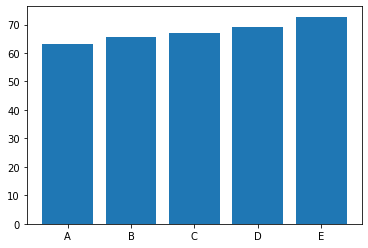

In [33]:
complete_scores_plot = complete_scores_pivot.reset_index()
plt.bar(complete_scores_plot['race/ethnicity'], complete_scores_plot['Average'])
plt.show()

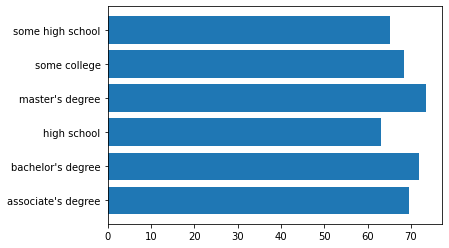

In [34]:
parental_plot = parental_scores.reset_index()
plt.barh(parental_plot['parental level of education'], parental_plot['Average'])

plt.show()

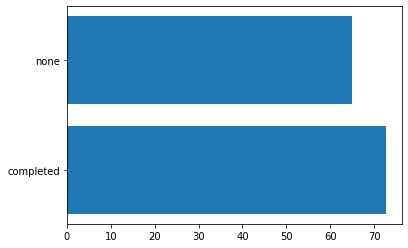

In [35]:
test_prep_plot = test_prep.reset_index()
plt.barh(test_prep_plot['test preparation course'], test_prep_plot['Average'])

plt.show()